<a href="https://colab.research.google.com/github/geetika18/Tensorflow-Playground/blob/main/01_Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow
Predicting a numerical variable based on some other combinations of variables. 

In [86]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating some data to view and fit

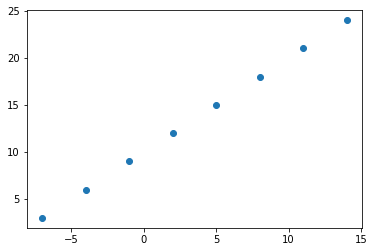

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [88]:
y == X +10 

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [89]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [90]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [91]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [92]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

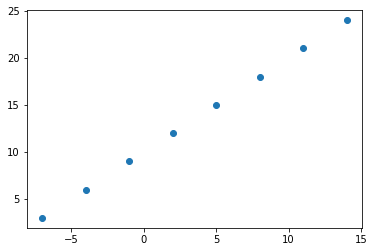

In [93]:
plt.scatter(X,y)

## steps in modelling with tensorflow
1. **creating a model** - define the input and putput layers as well as hidden layers of a deep learning model.
2. **compiling the model** - define a loss function(function which tells how wrong model is) and the optimiser( tells our model how to improve the patterns its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **fitting a model** - letting the model try to find patterns between X & y(features and labels).


In [94]:
# set random seed
tf.random.set_seed(42)

# 1. creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile( loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. fit model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 5) # epochs - how many times the model will go through all of the training examples

Epoch 1/5
1/1 [==============================] - 0s 344ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [95]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [96]:
# Making a prediction using the model above
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [97]:
# Improve the model - let's rebuild teh model

# 1. creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile( loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
              metrics = ["mae"])

# 3. fit model
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100) # epochs - how many times the model will go through all of the training examples

Epoch 1/100
1/1 [==============================] - 0s 346ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [98]:
model.predict([17.0]) 

array([[29.739855]], dtype=float32)

In [99]:
# improve model again 
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(100, activation = "relu"),
      tf.keras.layers.Dense(1)
  ])

model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["mae"])
  
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 200)

Epoch 1/200
1/1 [==============================] - 1s 747ms/step - loss: 12.9513 - mae: 12.9513
Epoch 2/200
1/1 [==============================] - 0s 13ms/step - loss: 12.5285 - mae: 12.5285
Epoch 3/200
1/1 [==============================] - 0s 20ms/step - loss: 12.1098 - mae: 12.1098
Epoch 4/200
1/1 [==============================] - 0s 24ms/step - loss: 11.6979 - mae: 11.6979
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 11.2893 - mae: 11.2893
Epoch 6/200
1/1 [==============================] - 0s 19ms/step - loss: 10.8902 - mae: 10.8902
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 10.5068 - mae: 10.5068
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 10.1209 - mae: 10.1209
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 9.7311 - mae: 9.7311
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 9.3167 - mae: 9.3167
Epoch 11/200
1/1 [==============================] - 0s 

In [100]:
model.predict([17.0])

array([[27.807995]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building neural netwroks is: 
...
Build a model --> fit it --> evaluate it --> tweak the model --> fit it --> evaluate it --> tweak the model --> fit it --> evaluate it ...
...

## when it comes to evaluation: 
" Visualize, Visualize, Visualize"
* the data
* the model
* the training of a model
* the predictions of the model


In [101]:
# make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [102]:
# Make labels for dataset
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

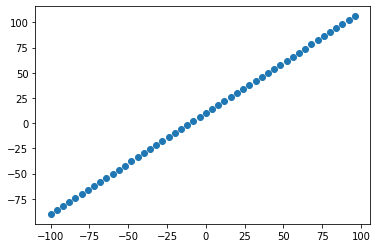

In [103]:
# visualise data
plt.scatter(X,y)

### The 3 sets...
* training set - the model learns from this data which is typically 70-80 percent of total data you have. 
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* test set - the model gets evaluated on this data to test what is had learned , this set is typically 10-15% of total data available. 

In [104]:
# check the length of samples
len(X)

50

In [105]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test
                  )

(40, 10)

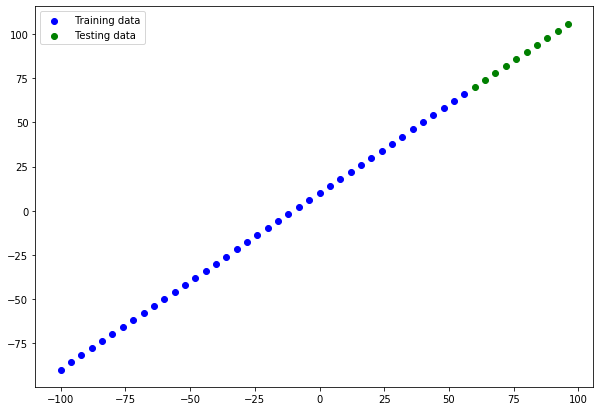

In [106]:
### Visualizing the data
plt.figure(figsize= (10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c ="b", label = " Training data")
# plot the test data in green
plt.scatter(X_test, y_test, c = "g", label = " Testing data")
# Show legend
plt.legend();

In [107]:
# Let's have a look at how to build a neural network for the data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

#model.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

In [108]:
model.summary()

ValueError: ignored

In [110]:
# let's create a model which builds automatically by defining the input shape

tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer"),
], name = "model1")
 # compile model

model.compile(loss = tf.keras.losses.mae,
  optimizer = tf.keras.optimizers.SGD(),
  metrics = ["mae"]
)
 

In [114]:
# let's fit model to training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)

In [115]:
model.summary() 

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - parameters that the model can update as it trains.
* Non trainable parameters : which model can't update. This is typical when you bring in already learned parameters from other models during transfer learning)

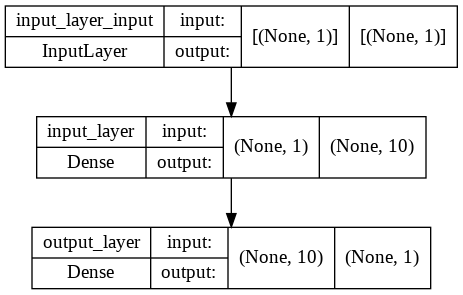

In [116]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualising the model's predictions 
plotting predictions vs ground truth labels

In [117]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [118]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [121]:
# let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and copare the predictions to ground truth labels
  """
  plt.figure(figsize = (10,10))

  # plot training data
  plt.scatter(train_data, train_labels, c = "b", label="Training data")
  # plot testing data
  plt.scatter(test_data, test_labels, c = "y", label ="Testing data")
  # plot predictions 
  plt.scatter(test_data, predictions, c ="r", label="Predictions")

  plt.legend()

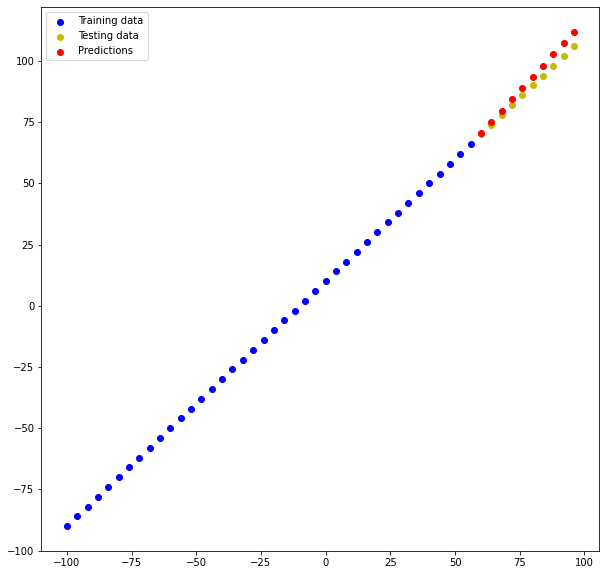

In [123]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

### Evaluation od model using regression evaluation metrics
there are different evaluation metrics to evaluate your model
Since we are working on regression problem, two of main metrics:
* MAE - mean absolute error, " On average, how wrong is each of my model's predictions"
* MSE - mean square error, " square the average errors"


In [124]:
# evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 275ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [125]:
y_pred, y_test

(array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [131]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [136]:
# calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [144]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiments to improve our model

Build a model--> fit it --> evaluate it--> tweak it--> fit it-->evaluate it

1. get more data
2. make model larger
3. train for longer

In [139]:
# Set random seed
tf.random.set_seed(42)

# create model1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fit model
model_1.fit(tf.expand_dims(X_train, axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 9ms/step - 

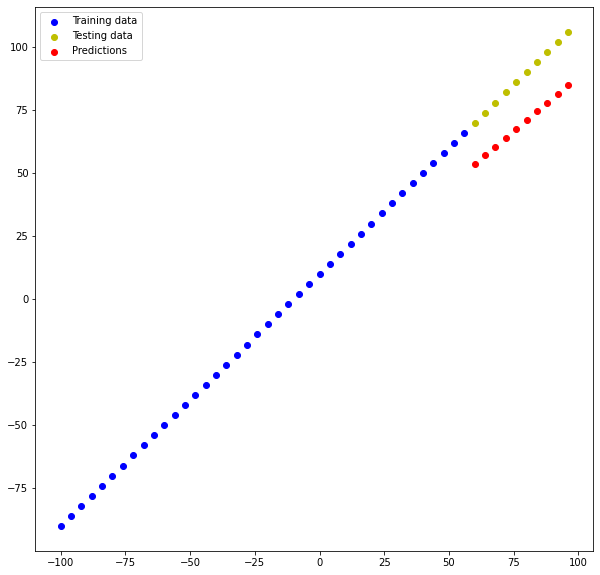

In [141]:
# make prediction
y_pred_1 = model_1.predict(X_test)

plot_predictions(predictions = y_pred_1)

In [145]:
# calculate evaluation on model_1
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

#### Build model_2
 with 2 layers and 100 epochs

In [149]:
# set random seed
tf.random.set_seed(42)

# create a model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# fit model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs =100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [=========================

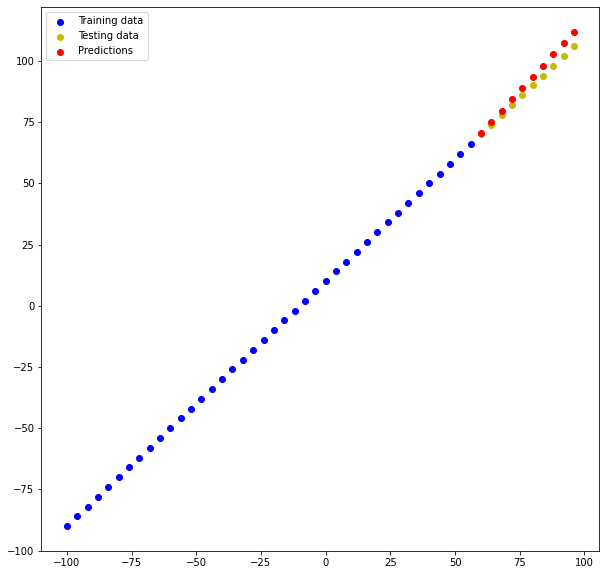

In [151]:
# make and plot predictions
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [155]:
# evaluate model_2
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

#### Build model_3
2 layers and 500 epochs

In [158]:
# set random seed
tf.random.set_seed(42)

# create a model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

# fit model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs =500, verbose=0)

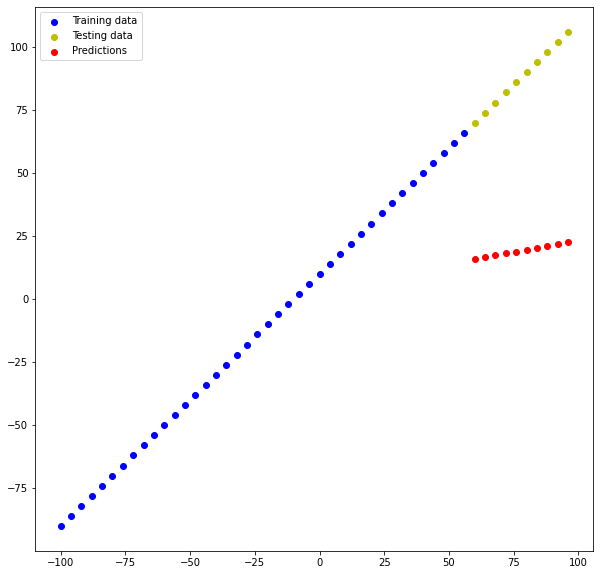

In [159]:
# make and plot predictions
y_pred_3 = model_3.predict(X_test)

plot_predictions(predictions=y_pred_3)
# this model is overfitting 

In [160]:
# evaluate model_3
mae_3 = mae(y_test, y_pred_3)
mse_3 = mae(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.713615>)

### Comparing tesorflow model experiments results

In [162]:
# let's compare our models' results using panda dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns =["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,68.713615


## Model_2 performed best!!

In [163]:
model_2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 10)                20        
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
